In [130]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import random

In [126]:
total_df = pd.read_csv(open('../data/train.csv', 'r'))

/Users/crhanlon/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [127]:
def _augment_matrix(play_df):
    """
    inputs:
        play_df (pandas DataFrame): DataFrame containing all play information
    outputs:
        augmented_df (pandas DataFrame): DataFrame containing augmented information
    """
    augmented_df = play_df.copy()
    
    # Identify the rusher
    runner_id = play_df.iloc[0]['NflIdRusher']
    runner_row = play_df[play_df['NflId'] == runner_id]
    if runner_row.shape[0] != 1:
        raise Exception('Incorrect runner matching')
    runner_row = runner_row.iloc[0]
    
    # Identify the team that has possession
    possession_team_ha = runner_row['Team']
    
    # Determine whether the ball is on the home/road team's side of the field
    home_team = runner_row['HomeTeamAbbr']
    field_pos_home = 'away'
    if augmented_df.iloc[0]['FieldPosition'] == home_team:
        field_pos_home = 'home'
    
    # Indicates if the player is on offense
    augmented_df['isOffense'] = augmented_df['Team'] == possession_team_ha
    # Indicates the side of the field relative to home/road team
    augmented_df['fieldPositionHome'] = field_pos_home
    # Indicates if the player is the rusher
    augmented_df['isRusher'] = augmented_df['NflId'] == runner_id
    return augmented_df

In [128]:
def plot_augmented_df(augmented_df, zoom=False):
    """
    inputs:
        augmented_df(pandas DataFrame): play's augmented dataframe
    outputs:
        figure (pyplot figure): figure of play
    """
    # Subset dataframe
    non_rushing_df = augmented_df[~augmented_df['isRusher']]
    rushing_df = augmented_df[augmented_df['isRusher']]
    offense_df = non_rushing_df[non_rushing_df['isOffense']]
    defense_df = non_rushing_df[~non_rushing_df['isOffense']]
    
    # Identify player coordinates
    off_x = offense_df['X']
    off_y = offense_df['Y']
    rush_x = rushing_df['X']
    rush_y = rushing_df['Y']
    def_x = defense_df['X']
    def_y = defense_df['Y']
    
    # Line of scrimmage
    los = rushing_df.iloc[0]['YardLine']
    if rushing_df.iloc[0]['fieldPositionHome'] == 'home':
        los = 110 - los
    else:
        los += 10
    r_row = rushing_df.iloc[0]
    
    # Initialize figure
    fig = plt.figure(1, figsize=[12, 5])
    
    # Plot yard lines
    plt.plot([0, 120], [0, 0], c='k')
    plt.plot([0, 120], [53, 53], c='k')
    plt.plot([0, 0], [0, 53], c='k')
    plt.plot([10, 10], [0, 53], c='k')
    plt.plot([110, 110], [0, 53], c='k')
    plt.plot([120, 120], [0, 53], c='k')
    for i in range(15, 106, 5):
        plt.plot([i, i], [0, 53], c='k', ls='--')
    
    # Plot LOS
    plt.plot([los, los], [0, 53], c='c', ls='--')
    
    # Plot players
    plt.scatter(off_x, off_y, c='b')
    plt.scatter(rush_x, rush_y, c='g')
    plt.scatter(def_x, def_y, c='r')
    plt.show()

[20171231030243 20181007031477 20180930060288 20171231021164
 20181216022938]


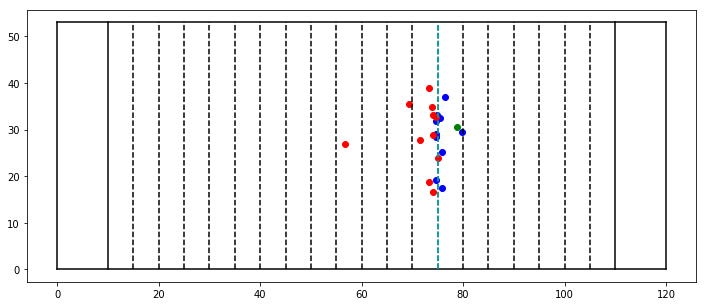

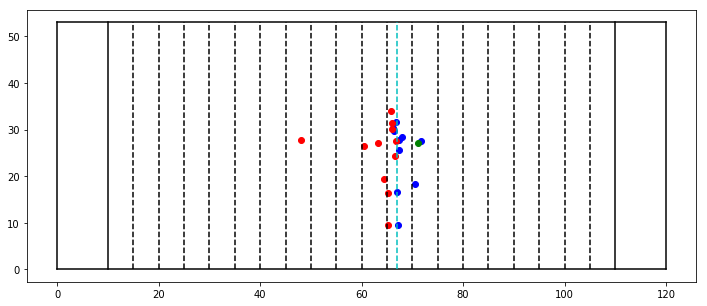

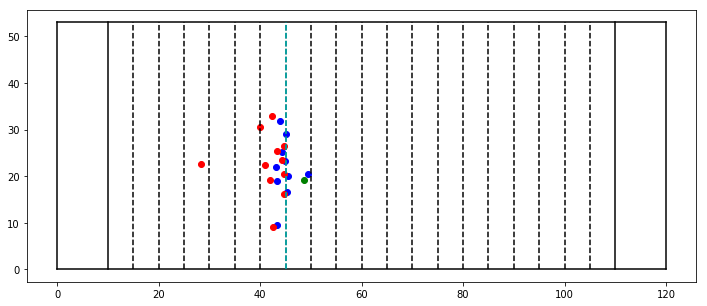

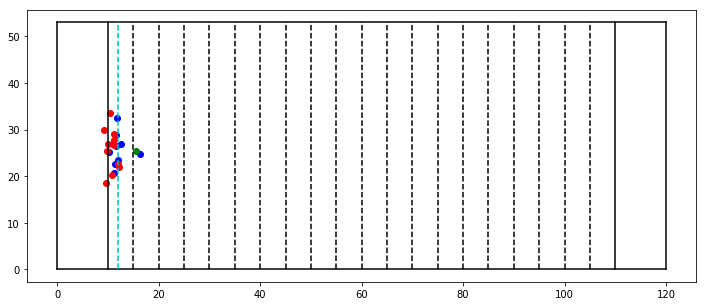

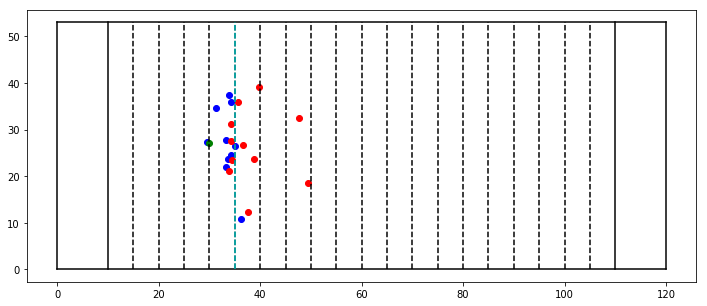

In [138]:
play_id_list = np.random.choice(total_df['PlayId'].unique(), 5)
print(play_id_list)
for p_id in total_df['PlayId'].unique()[:5]:
    play_df = total_df[total_df['PlayId'] == p_id]
    augmented_df = _augment_matrix(play_df)
    plot_augmented_df(augmented_df)